In this notebook, I take a quick look at all CSV files, inlcuding train_users_2.csv, test_users.csv, sessions.csv, countries.csv and age_gender_bkts.csv (see https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data for more details). The main questions to answer in this notebook are the following: 
- How many features are there in each dataFrame extracted from the provided CSV files? What kind of features are they? what are their data types?
- Are there many missing values in each table?
- Is the amount of missing values significant?
- Any idea to merge the tables in the future?

In [1]:
import pandas as pd
%matplotlib inline

#make the pandas look easier to read
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### df_train

First, let's take a look at the major training set of users.

In [2]:
#loading training table: train_users_2
df_train=pd.read_csv('train_users_2.csv')
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


Let's see how many columns do we have and are there significant amount of missing values with them.

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 27.7+ MB


It can be seen from table above that:
- there are 16 columns in this table
- there are some missing values with the features: 'age', 'first_affiliate_tracked'. Note that we need to further check values for each column to determine if there are 'hidden' missing values, such as those like 'unknown'
- 'age' is the numerical feature
- 'date_account_created' and 'date_first_booking' are of type date/time; they might need to further decomposed to be ready as the input of machine learning algorithms 
- all the others are categorical features

Then, let's check the occurance of all possible values for categorical variables. Below are some examples:

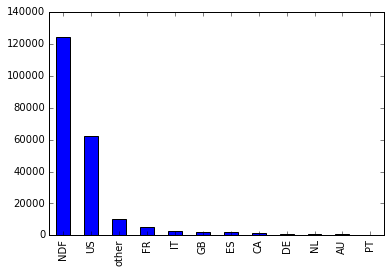

In [4]:
df_train.country_destination.value_counts().plot(kind='bar')#.describe()

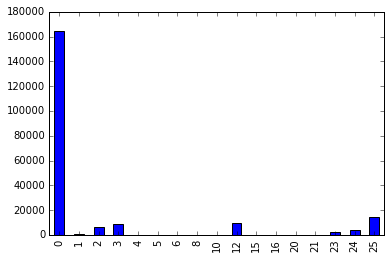

In [8]:
df_train.signup_flow.value_counts().sort_index().plot(kind='bar')#.describe()

By looking at all categorical features, one can get a sense about them. For instance, each of these categorical features takes 10-30 different possible values. When using one-hot-encoding for them in the future, the amount of features should be managable.

### df_test

The next table to look at the test set for users:

In [10]:
df_test=pd.read_csv('test_users.csv')
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.6+ MB


This structure and property of this table is quite similar to df_train except that it does not have the columns 'date_first_booking' and 'country_destination'. This makes sense given the fact that we are actually asked to predict the destination country of the users.

### df_session

Next, let's take a look at the web sessions log for users. In this data set, the data only dates back to 1/1/2014, while the users dataset dates back to 2010, while the users data set dates back to 2010.

In [9]:
df_session=pd.read_csv('sessions.csv')
df_session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435


Apparently, this table is to be mergered with the user table with the key'user_id'. As before, Let's check the major categorical features, including 'action', 'action_type' and 'action_detail':

In [17]:
df_session.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 564.4+ MB


In [11]:
df_session.action_type.value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [13]:
df_session.action.value_counts()

show                           2768278
index                           843699
search_results                  725226
personalize                     706824
search                          536057
ajax_refresh_subtotal           487744
update                          365130
similar_listings                364624
social_connections              339000
reviews                         320591
active                          188036
similar_listings_v2             168788
lookup                          162041
create                          155887
dashboard                       152952
header_userpic                  141830
collections                     124417
edit                            109083
campaigns                       105028
track_page_view                  81117
unavailabilities                 78317
qt2                              64651
notifications                    59392
confirm_email                    58726
requested                        57034
identity                 

In [12]:
len(df_session.action.value_counts())

359

One can found that 'action_type' takes 10 possible different values, while 'action' and 'action_details' take hundreds of different different values. Therefore, they might cause potential problems when decomposing and agregating the features (see notebook session_feature_extraction for more details).

In the end, I will take a quick look at the 'countries.csv' and 'age_gender_bkts.csv' file, which contains summary statistics of destination countries in this dataset and their locations and summary statistics of users' age group, gender, country of destination, respectively.

### df_countries

In [19]:
df_countries=pd.read_csv('countries.csv')
df_countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675,eng,0.00


In [20]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 7 columns):
country_destination              10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null float64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
dtypes: float64(5), object(2)
memory usage: 640.0+ bytes


### df_age_gender

In [21]:
df_age_gender=pd.read_csv('age_gender_bkts.csv')
df_age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1,2015
1,95-99,AU,male,9,2015
2,90-94,AU,male,47,2015
3,85-89,AU,male,118,2015
4,80-84,AU,male,199,2015


In [22]:
df_age_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 19.7+ KB
